<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-11-22 17:54:51
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  98.12 L
CY Investment:  1.11 C
Reserve:  400.00
Current:  1.13 C
-------------------
Today PnL: 1.67 L (1.5%)
Current PnL: -6.99 L (-6.29%)
CY Booked + Current PnL: 1.40 L (1.26%)
-------------------
Total profit:  7.32 L
Total loss:  -14.31 L
-------------------
Total Booked + Current PnL: 14.51 L (14.78%)
Total Booked PnL: 21.50 L (21.91%)
Curr Year Booked PnL: 8.39 L (7.43%)
Prev Year Booked PnL: 13.11 L (13.36%)
Est FTT:  1.89 C
Est FTT PnL: 75.63 L (66.99%)
-------------------
Est LTT:  2.37 C
Est LTT PnL: 1.24 C (110.11%)
Deployed:  98.12 L
Current:  1.13 C
CAGR/XIRR %: 12.94%


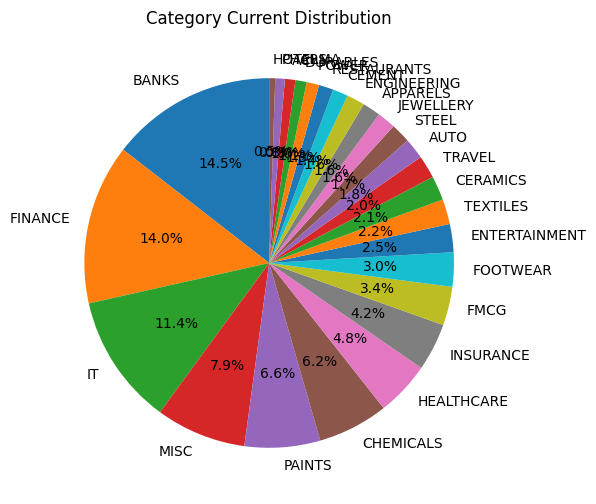

In [ ]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [ ]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1898.40,2006.00,51.18,87.36,142380.0,41205.0,8073.0,3.38,40.73,5.67,48.70,86.0,5.10,1.26,50.20,X40,BTT,IT
86,WIPRO,401.00,571.65,611.00,34.51,90.80,240665.0,71844.0,16558.0,2.60,42.56,6.88,52.37,30.0,4.34,2.13,44.66,XR,NTT,IT
49,LTIM,5051.49,6133.70,7262.39,24.30,89.66,98139.0,17315.0,18058.0,3.42,21.42,18.40,43.77,12.0,0.96,0.87,35.17,X200,ATH,IT
76,TCS,4073.44,4244.60,4998.00,7.98,94.83,101870.0,4107.0,18082.0,4.22,4.20,17.75,22.70,15.0,0.23,0.90,24.84,X40,BTT,IT
47,LALPATHLAB,2519.90,3053.65,3689.00,-5.62,34.48,109931.0,19215.0,22877.0,0.91,21.18,20.81,46.39,26.0,0.84,0.97,52.74,X40N,NTT,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,SAIL,130.64,112.83,228.00,45.60,36.78,194293.0,-30669.0,198315.0,2.03,-13.63,102.07,74.53,-23.0,-0.15,1.72,28.48,XSP,BTT,STEEL
18,CAMPUS,294.86,261.45,631.85,0.54,21.84,148765.0,-19010.0,210755.0,1.79,-11.33,141.67,114.29,-31.0,-0.09,1.32,21.89,XSP,ATH,FOOTWEAR
11,BANDHANBNK,223.20,169.93,400.00,-40.72,65.52,166022.0,-52044.0,224777.0,2.45,-23.87,135.39,79.21,-24.0,-0.23,1.47,2.93,XSP,NTT,BANKS
74,TANLA,991.56,680.40,2007.31,-43.22,12.64,150368.0,-68767.0,293248.0,0.43,-31.38,195.02,102.44,-33.0,-0.23,1.33,0.43,AR,ATH,IT


In [ ]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
49,LTIM,5051.49,6133.70,7262.39,24.30,89.66,98139.0,17315.0,18058.0,3.42,21.42,18.40,43.77,12.0,0.96,0.87,35.17,X200,ATH,IT
76,TCS,4073.44,4244.60,4998.00,7.98,94.83,101870.0,4107.0,18082.0,4.22,4.20,17.75,22.70,15.0,0.23,0.90,24.84,X40,BTT,IT
47,LALPATHLAB,2519.90,3053.65,3689.00,-5.62,34.48,109931.0,19215.0,22877.0,0.91,21.18,20.81,46.39,26.0,0.84,0.97,52.74,X40N,NTT,HEALTHCARE
25,FINEORG,4771.46,5144.80,7168.71,2.59,91.95,87462.0,6347.0,34408.0,9.62,7.82,39.34,50.24,-1.0,0.18,0.77,27.74,X40N,ATH,CHEMICALS
82,UNIONBANK,124.65,115.04,163.00,-10.69,93.10,92492.0,-7727.0,38560.0,-0.16,-7.71,41.69,30.77,-35.0,-0.20,0.82,11.29,XSP,NTT,BANKS
22,DABUR,523.35,513.00,735.00,-12.73,28.74,89775.0,-1811.0,38846.0,1.43,-1.98,43.27,40.44,-3.0,-0.05,0.80,4.58,X40,BTT,FMCG
80,TTKPRESTIG,769.29,850.30,1149.24,22.88,71.26,111389.0,10612.0,39164.0,-0.01,10.53,35.16,49.39,16.0,0.27,0.99,27.94,X40N,ATH,DURABLES
15,BAYERCROP,4346.57,5737.05,8325.00,10.60,18.39,91793.0,22248.0,41408.0,-0.87,31.99,45.11,91.53,20.0,0.54,0.81,15.69,X40N,BTT,CHEMICALS
85,VIPIND,488.80,501.45,718.00,NaN,86.21,97783.0,2467.0,42223.0,1.63,2.59,43.18,46.89,-25.0,0.06,0.87,16.05,X40N,NTT,MISC
37,INDUSINDBK,1354.50,998.20,1800.00,-43.90,2.30,56897.0,-20310.0,45700.0,1.71,-26.31,80.32,32.89,-20.0,-0.44,0.50,1.71,XR,NTT,BANKS


In [ ]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,313.80,387.00,-9.76,74.71,155017.0,-3182.0,36165.0,-0.13,-2.01,23.33,20.85,85.0,-0.09,1.37,41.83,XSP,BTT,FINANCE
82,UNIONBANK,124.65,115.04,163.00,-10.69,93.10,92492.0,-7727.0,38560.0,-0.16,-7.71,41.69,30.77,-35.0,-0.20,0.82,11.29,XSP,NTT,BANKS
7,ATULAUTO,656.09,548.25,844.00,NaN,27.59,86624.0,-17038.0,46725.0,1.02,-16.44,53.94,28.64,-64.0,-0.36,0.77,15.25,XSP,NTT,AUTO
52,MEDANTA,1022.60,1113.65,1486.00,-1.12,98.85,169275.0,13840.0,56606.0,3.80,8.90,33.44,45.32,60.0,0.24,1.50,23.98,XSP,NTT,HEALTHCARE
56,QUESS,716.17,644.30,986.00,-23.01,33.33,112752.0,-12578.0,59792.0,0.56,-10.04,53.03,37.68,-28.0,-0.21,1.00,37.80,XSP,NTT,MISC
68,SHALBY,271.92,215.33,327.00,NaN,14.94,119077.0,-31295.0,61753.0,-0.19,-20.81,51.86,20.26,-46.0,-0.51,1.05,2.25,XSP,NTT,HEALTHCARE
24,EASEMYTRIP,39.93,32.03,52.80,NaN,94.83,98909.0,-24395.0,64142.0,8.50,-19.78,64.85,32.23,-82.0,-0.38,0.88,10.87,XSP,NTT,TRAVEL
16,BERGEPAINT,558.54,476.25,680.00,-37.11,13.79,150971.0,-26086.0,64585.0,2.31,-14.73,42.78,21.75,-16.0,-0.40,1.34,5.18,XSP,NTT,PAINTS
45,KANSAINER,299.63,267.25,340.00,-42.81,62.07,240525.0,-29142.0,65471.0,4.62,-10.81,27.22,13.47,-28.0,-0.45,2.13,4.62,XSP,NTT,PAINTS
39,IRCTC,904.87,808.60,1269.00,-21.74,64.37,126142.0,-15018.0,71825.0,1.86,-10.64,56.94,40.24,15.0,-0.21,1.12,17.80,XSP,BTT,TRAVEL


In [ ]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.28
1,20,35.61
2,30,49.48


In [ ]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,35.34
X40,21.91
XR,18.80
X40N,15.84
AR,5.70
SR,1.55
X200,0.87


In [ ]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.50,-10.87,68.12
FINANCE,14.03,-7.40,63.17
IT,11.42,4.75,49.15
MISC,7.92,-7.92,64.75
PAINTS,6.61,-10.28,42.92
CHEMICALS,6.17,-3.92,71.57
HEALTHCARE,4.74,8.60,39.32
INSURANCE,4.16,3.41,47.87
FMCG,3.39,-9.99,51.64
